In [1]:
!pip install -Uqq fastbook
import fastbook

fastbook.setup_book()

from fastbook import *
from fastai.vision.all import *
import pandas as pd

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
path=Path('/kaggle/input/mushroom-species/dataset')
path

Path('/kaggle/input/mushroom-species/dataset')

In [3]:
path.ls()

(#100) [Path('/kaggle/input/mushroom-species/dataset/Stropharia aeruginosa'),Path('/kaggle/input/mushroom-species/dataset/Urnula craterium'),Path('/kaggle/input/mushroom-species/dataset/Hericium coralloides'),Path('/kaggle/input/mushroom-species/dataset/Artomyces pyxidatus'),Path('/kaggle/input/mushroom-species/dataset/Coprinellus micaceus'),Path('/kaggle/input/mushroom-species/dataset/Rhytisma acerinum'),Path('/kaggle/input/mushroom-species/dataset/Cerioporus squamosus'),Path('/kaggle/input/mushroom-species/dataset/Fomes fomentarius'),Path('/kaggle/input/mushroom-species/dataset/Gyromitra gigas'),Path('/kaggle/input/mushroom-species/dataset/Cantharellus cibarius')...]

In [4]:
datablock=DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   splitter=RandomSplitter(valid_pct=0.2, seed=42),
                   get_y=parent_label,
                   item_tfms=Resize(400),
                   batch_tfms=aug_transforms(size=224, min_scale=0.75))

dls=datablock.dataloaders(path)

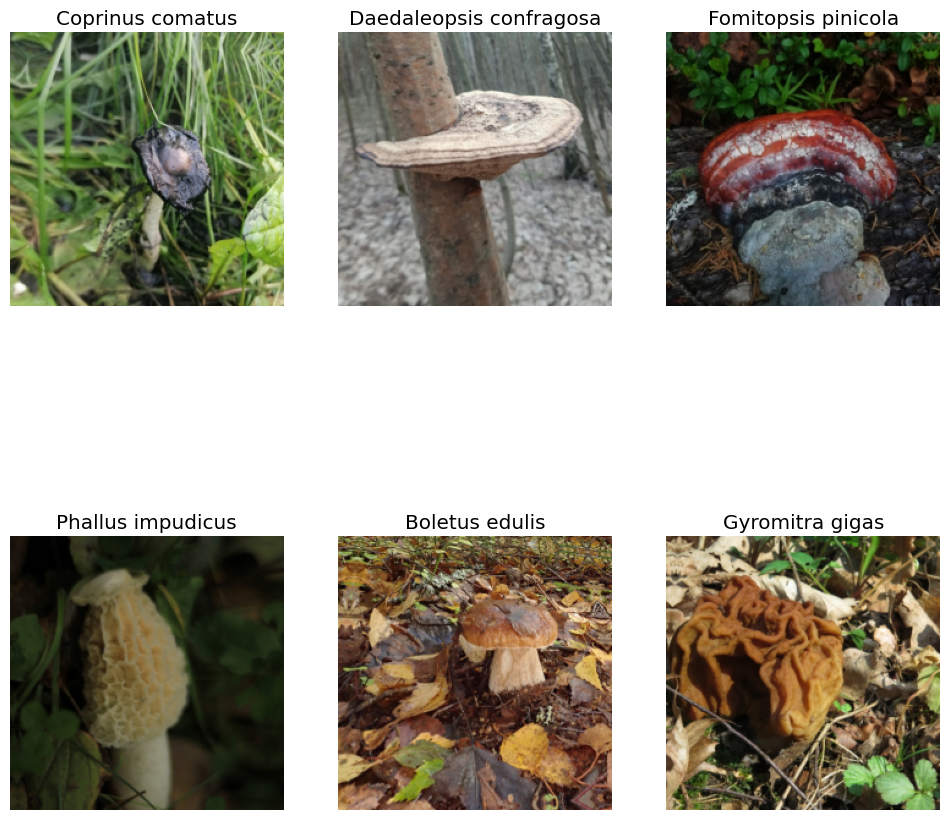

In [5]:
dls.show_batch(max_n=6, figsize=(12, 12))

In [6]:
learner=vision_learner(dls, resnet34, metrics=(error_rate, accuracy))
learner.fine_tune(5)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 110MB/s] 


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.382796,0.996103,0.288705,0.711295,17:53


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.830156,0.647082,0.192944,0.807056,14:05
1,0.752780,0.597925,0.174593,0.825407,14:04
2,0.525641,0.470051,0.142285,0.857715,13:43
3,0.339101,0.410282,0.122512,0.877488,13:44
4,0.267249,0.390965,0.115404,0.884596,13:55


In [9]:
#Skip. There are too many categories to display the matrix.
# explain=ClassificationInterpretation.from_learner(learner)
# explain.plot_confusion_matrix(figsize=(12, 12), dpi=60)

SuggestedLRs(valley=1.2022644114040304e-05)

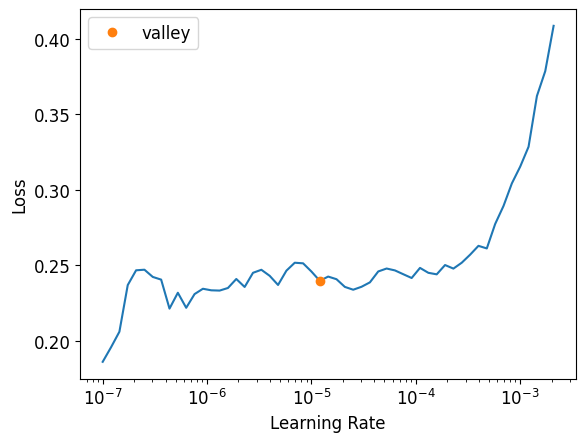

In [8]:
learner.lr_find()

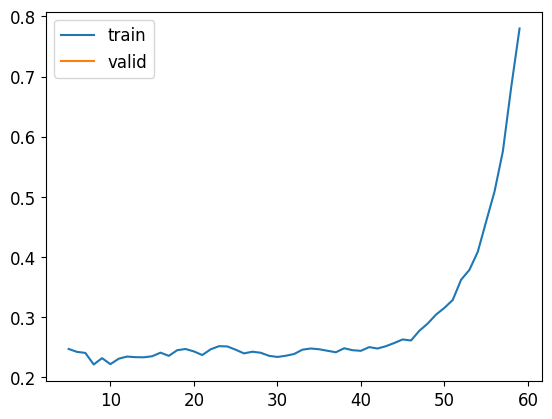

In [10]:
learner.recorder.plot_loss()

In [11]:
learner.summary()

Sequential (Input shape: 64 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 112 x 112 
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 56 x 56   
MaxPool2d                                                      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                      